Ejercicio 1: Correlacion

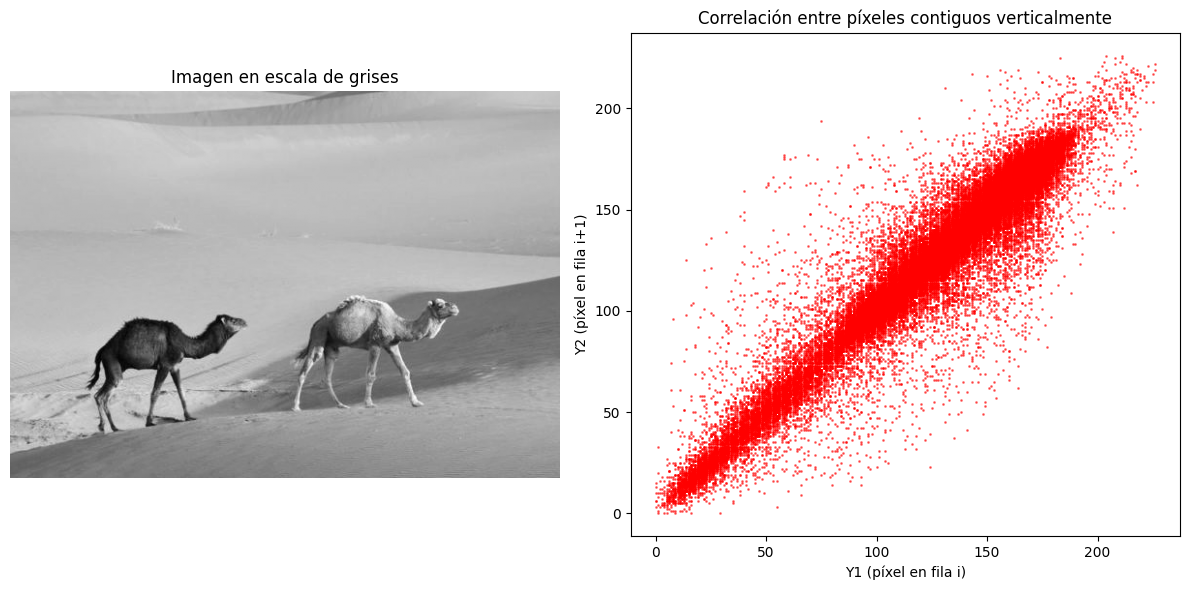

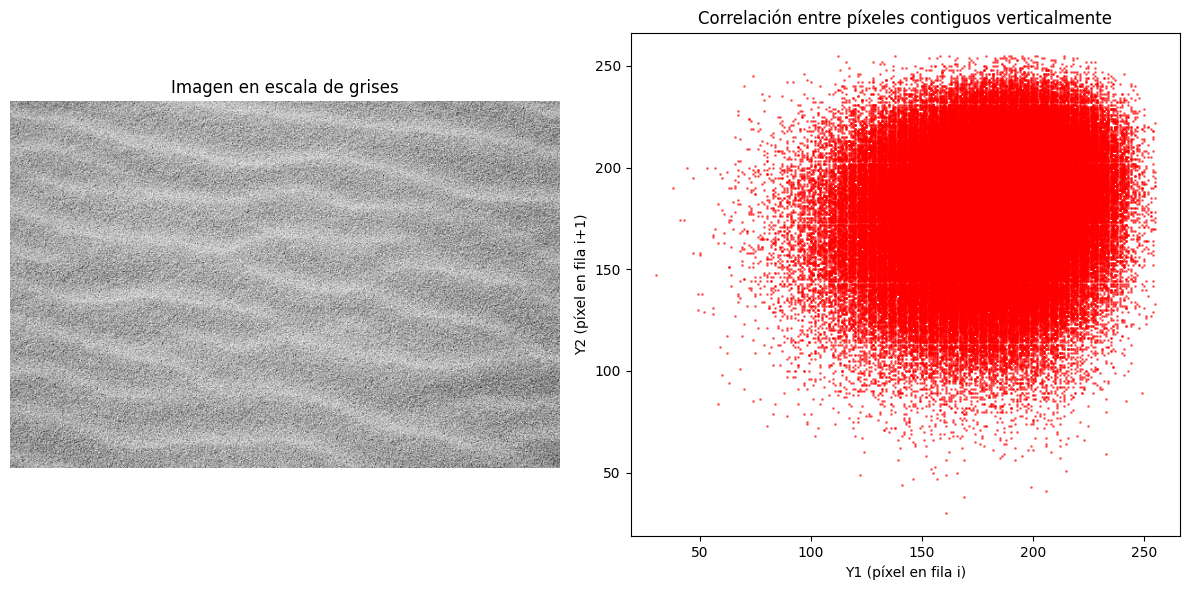

Coeficientes de correlación imagen 1: 0.9789354535355658
Coeficientes de correlación imagen 2: 0.1460473239944978


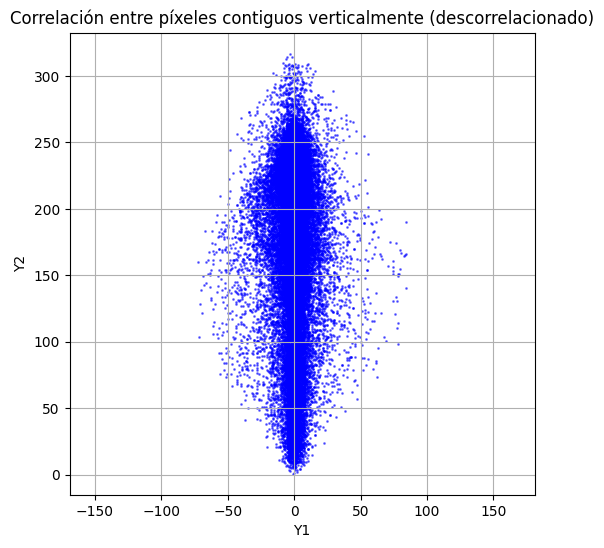

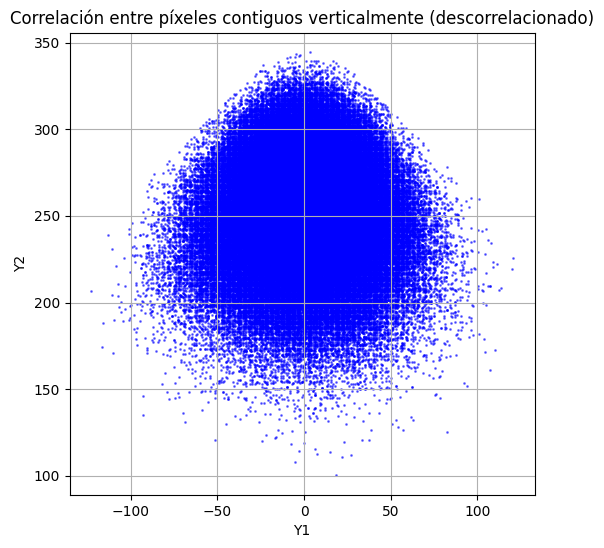

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def img_to_vect(img):
    """
    Convierte una imagen en escala de grises a un vector de tipo float.
    """
    return img.astype(float).flatten()

def graficar_vector_imagen(img):
    """
    Grafica la imagen en escala de grises y un gráfico de dispersión
    que muestra la correlación entre píxeles contiguos verticalmente.
    """

    y1 = img[:-1, :].flatten().astype(float) # Píxeles en la fila i (ignorando la última fila)
    y2 = img[1:, :].flatten().astype(float) # Píxeles en la fila i+1 (ignorando la primera fila)

    _, axs = plt.subplots(1, 2, figsize=(12, 6)) # Crear subplots de bloques 2x1

    # Imagen en escala de grises (en la misma figura)
    axs[0].imshow(img, cmap="gray")
    axs[0].set_title("Imagen en escala de grises")
    axs[0].axis("off")

    # Gráfico de dispersión (en la misma figura)
    axs[1].scatter(y1, y2, color="red", alpha=0.5, s=1) # Puntos rojos con transparencia (0.5) y tamaño pequeño (1)
    axs[1].set_title("Correlación entre píxeles contiguos verticalmente")
    axs[1].set_xlabel("Y1 (píxel en fila i)")
    axs[1].set_ylabel("Y2 (píxel en fila i+1)")

    plt.tight_layout() # Ajustar el diseño para evitar solapamientos
    plt.show() # Mostrar la figura

def correlacion(img):
    y1 = img[:-1, :].flatten().astype(float) # Píxeles en la fila i (ignorando la última fila)
    y2 = img[1:, :].flatten().astype(float) # Píxeles en la fila i+1 (ignorando la primera fila)

    result = np.corrcoef(y1, y2)[0, 1] # Coeficiente de correlación entre y1 y y2
    return result


def descorrelacion(img):
    y1 = img[:-1, :].flatten().astype(float) # Píxeles en la fila i (ignorando la última fila)
    y2 = img[1:, :].flatten().astype(float) # Píxeles en la fila i+1 (ignorando la primera fila)

    X = np.vstack((y1, y2)).T # Matriz de datos (transpuesta para tener muestras en filas)

    cx = np.cov(X, rowvar=False) # Matriz de covarianza
    _, eigvecs = np.linalg.eigh(cx)  # Eigh para matrices simétricas

    # Proyectar X sobre la base de autovectores (descorrelacionar)
    Y = X @ eigvecs  # Equivalente a Y = P^T X si X es columna, usamos @ para matriz

    return Y

def graficar_vector(y, lista):
    """
    Grafica un gráfico de dispersión para los vectores Y1 y Y2.
    """
    plt.figure(figsize=(6, 6))
    plt.scatter(y[:, 0], y[:, 1], color="blue", alpha=0.5, s=1) # Puntos azules con transparencia (0.5) y tamaño pequeño (1)
    plt.title("Correlación entre píxeles contiguos verticalmente (descorrelacionado)")
    plt.xlabel(lista[0])
    plt.ylabel(lista[1])
    plt.axis('equal')  # Igualar las escalas de los ejes
    plt.grid(True)     # Añadir una cuadrícula para mejor visualización
    plt.show()        # Mostrar la figura

# Imagen 1
img1 = cv2.imread("img_01.jpg", cv2.IMREAD_GRAYSCALE)
graficar_vector_imagen(img1)

# Imagen 2
img2 = cv2.imread("img_02.jpg", cv2.IMREAD_GRAYSCALE)
graficar_vector_imagen(img2)

# Correlacion de imagen 1
coefs_img1 = correlacion(img1)
print("Coeficientes de correlación imagen 1:", coefs_img1)

# Correlacion del imagen 2
coefs_img2 = correlacion(img2)
print("Coeficientes de correlación imagen 2:", coefs_img2)

#Descorrelacion del vector X (PCA sin reducir dimension)
y1 = descorrelacion(img1)
y2 = descorrelacion(img2)

#Graficar vectores proyectados
graficar_vector(y1, ['Y1', 'Y2'])
graficar_vector(y2, ['Y1', 'Y2'])

Ejercicio 4:

In [1]:
import cv2

def calcularMSE(img1, img2):
    Nh, Nw, canales = img1.shape
    #Nh = alto de la imagen (cant de filas)
    #Nw = ancho de la imagen (cant de columnas)
    suma = {1:0, 2:0, 3:0} #cada pixel tiene 3 canales, calculo la suma para cada canal del 1 al 3

    for i in range(Nh):
        for j in range(Nw):
            for c in range(canales):
                suma[c+1] += (img1[i][j][c] - img2[i][j][c])**2

    promedio = (suma[1] + suma[2] + suma[3])/3
    return (Nw*Nh) * promedio


original = cv2.imread("img_04.jpg")
#comprimida = original.comprimir
#reconstruida = comprimida.recomponer
reconstruida = cv2.imread("img_04.jpg") #este no es el codigo pero lo uso provisoriamente

S = [5*n for n in range(1, 20)]
'''La idea es comprimir diferentes imagenes con diferentes porcentajes de espacio ahorrado (S),
y para cada una de ellas calcular el MSE. graficar'''


print(calcularMSE(original, reconstruida))


0.0
